# Time Series Classification

### In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

### (a) Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29. The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

### b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [154]:
import pandas as pd
import os, sys
import numpy as np
import pdb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [22]:
train_data=[]
test_data=[]
df=[]
path1= '/Users/lubdhapimpale/AReM'
path2= os.listdir('/Users/lubdhapimpale/AReM')
path2.remove('.DS_Store')
path2.sort()

d=0
for j in range(0, len(path2)):
    path3= os.listdir(path1 +'/'+ path2[j])
    path3.sort()
    for i in range(0,len(path3)):
        df1 = pd.read_csv(path1+'/'+ path2[j] + '/'+path3[i], header=4,usecols=[*range(0,7)])
        df.append(df1)
        k=i+d
        
        if j in [0, 1]:
            df[k]['classes'] = 1
            if path3[i] in ['dataset1.csv','dataset2.csv']:
                test_data.append(df[k])
            else:
                train_data.append(df[k])
        else:
            df[k]['classes'] = 0
            if path3[i] in ['dataset1.csv','dataset2.csv','dataset3.csv']:
                test_data.append(df[k])
            else:
                train_data.append(df[k])
    d= d+len(path3)
         
test= pd.concat(test_data, ignore_index=True)     
train= pd.concat(train_data, ignore_index=True)    
     
TrainTest= pd.concat([train,test])

TrainTestList1 = train_data + test_data

### (c) Feature Extraction
### Classification of time series usually needs extracting features from them. In this problem, we focus on time-domain features.
### i. Types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc).


Mean, Median, Minimum, Maximum, 1st Quantile, 3rd Quantile, Standard Deviation

### ii. Extracting the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. 

In [30]:
mean1=[]
minimum=[]
maximum=[]
median1=[]
sdeviation=[]
quant1=[]
quant3=[]
for i in range(0,88):
    m= TrainTestList1[i].mean()
    mean1.append(m)
    m= TrainTestList1[i].min()
    minimum.append(m)
    m= TrainTestList1[i].max()
    maximum.append(m)
    m= TrainTestList1[i].median()
    median1.append(m)    
    m= TrainTestList1[i].std()
    sdeviation.append(m)  
    m= TrainTestList1[i].quantile(q= .25)
    quant1.append(m)  
    m= TrainTestList1[i].quantile(q= .75)
    quant3.append(m) 
        

k=0
new_dataset1= np.empty([88,42])
for j in range(1,7):
    for i in range(0,88):
        new_dataset1[i][k]= minimum[i][j]
        new_dataset1[i][k+1]= maximum[i][j]
        new_dataset1[i][k+2]= mean1[i][j]
        new_dataset1[i][k+3]= sdeviation[i][j]
        new_dataset1[i][k+4]= median1[i][j]
        new_dataset1[i][k+5]= quant1[i][j]
        new_dataset1[i][k+6]= quant3[i][j]
    k=k+7
new_dataset2= pd.DataFrame(new_dataset1)
    
classes1=pd.DataFrame(np.zeros((1,1)))
for f in range(0,88):
    if f in range(0,9):
        classes1[f]= 1
    elif f in range(69,73):
        classes1[f]= 1
    else:
        classes1[f]=0
classes1 = pd.DataFrame.transpose(classes1)
    
new_dataset2.columns=['min1','max1','mean1','std1','median1','quant11','quant31','min2','max2','mean2','std2','median2','quant12','quant32','min3','max3','mean3','std3','median3','quant13','quant33','min4','max4','mean4','std4','median4','quant14','quant34','min5','max5','mean5','std5','median5','quant15','quant35','min6','max6','mean6','std6','median6','quant16','quant36']


### (d) Binary Classification Using Logistic Regression
### i. Classify bending vs. other activities.

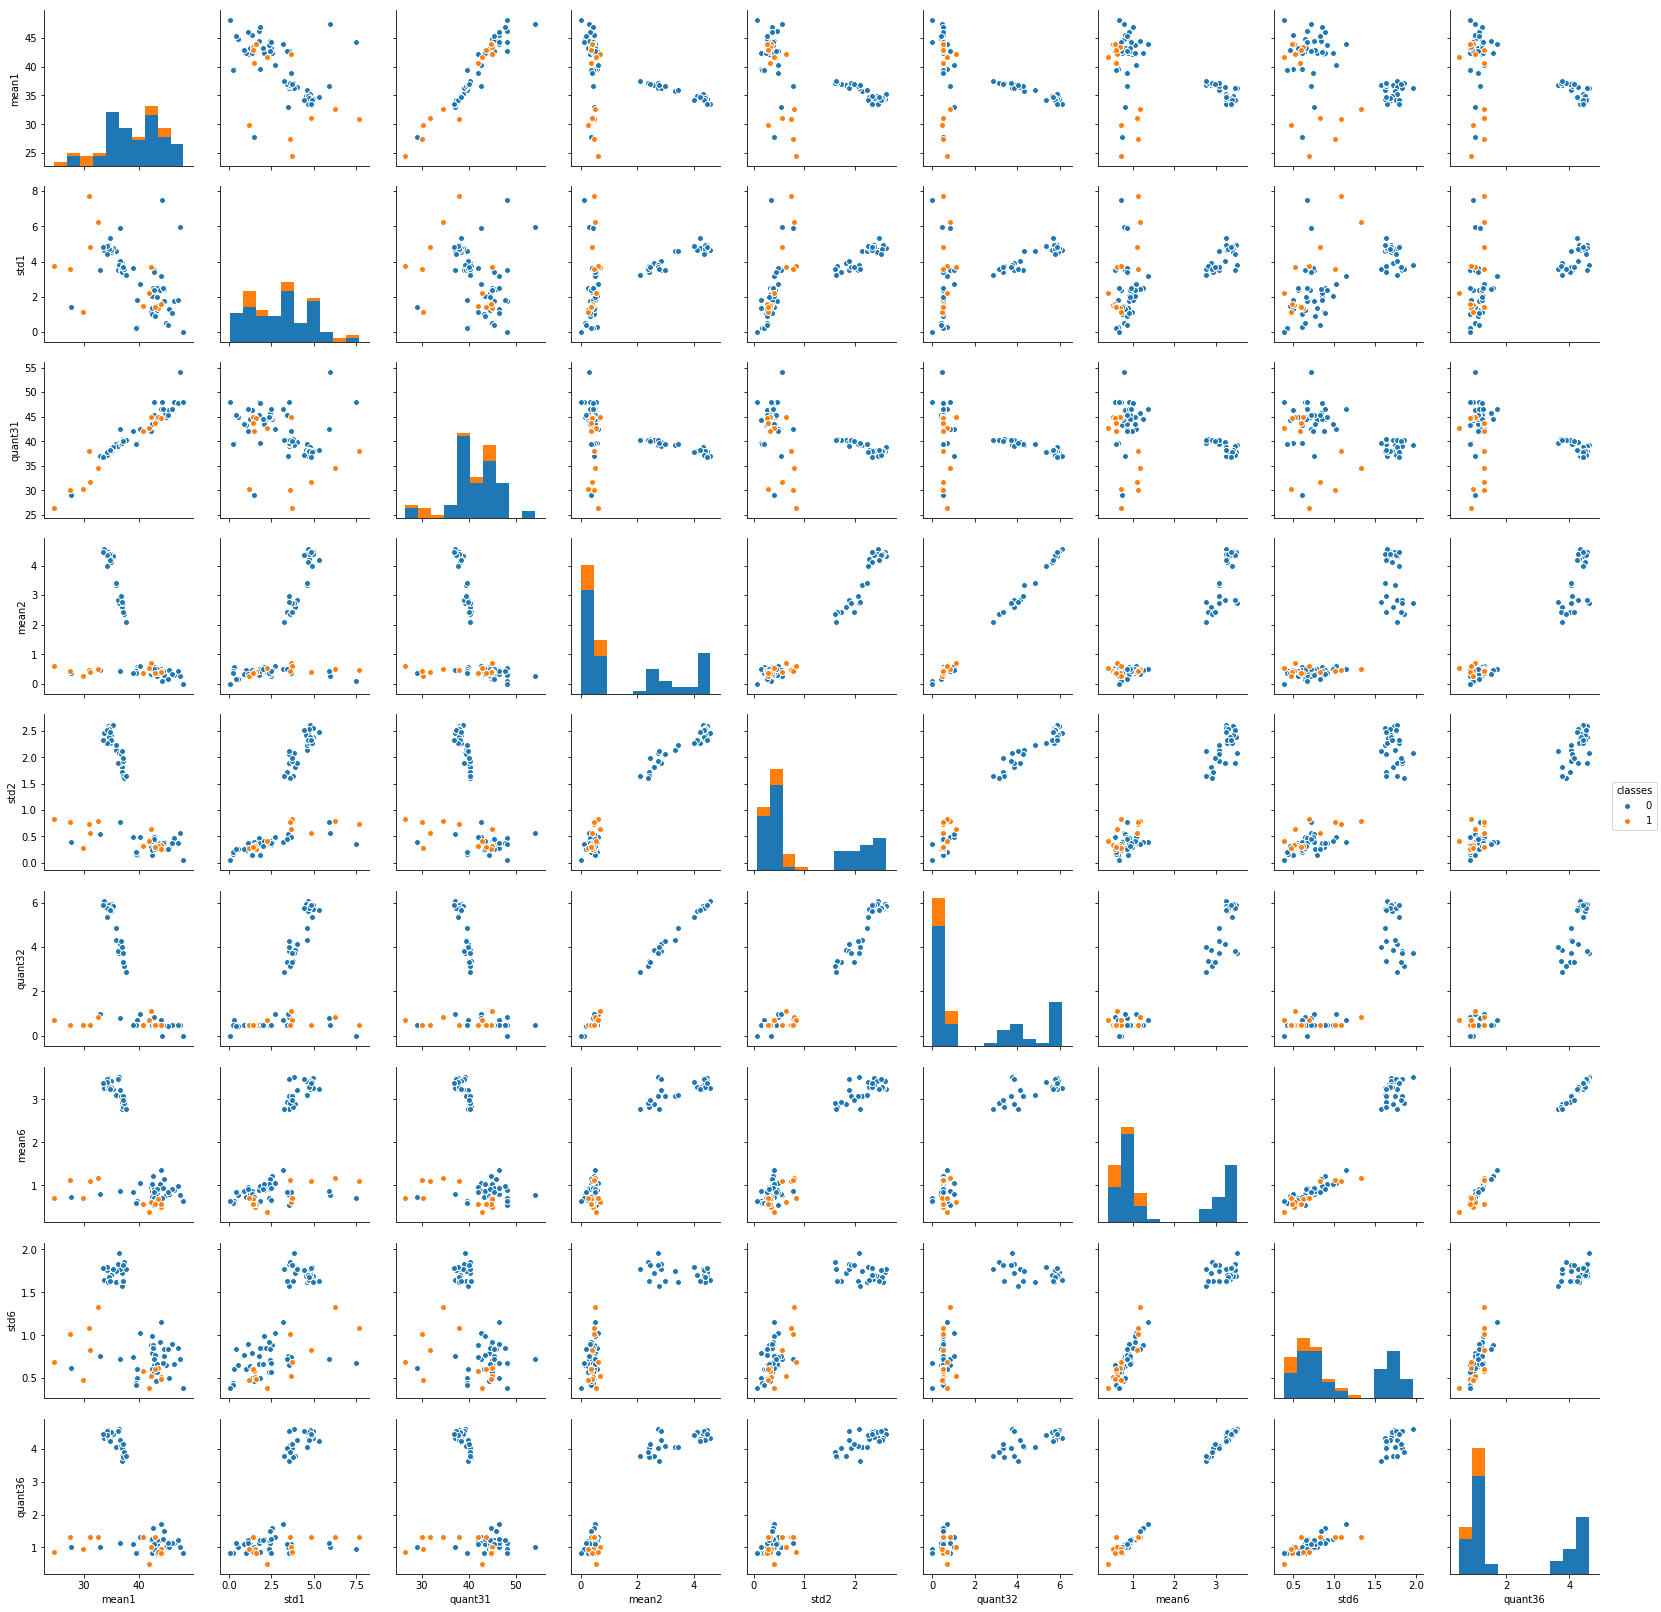

In [32]:
new_dataset2['classes']= classes1

new_dataset3= new_dataset2.iloc[:,[2,3,6,9,10,13,37,38,41,42]]
c= sns.pairplot(new_dataset3,hue ='classes', vars=['mean1','std1','quant31','mean2','std2','quant32','mean6','std6','quant36'])
plt.figure()

### ii. Break each time series in your training set into two (approximately) equal length time series. Now instead of 6 time series for each of the 88 instances, you have 12 time series for each instance. Repeat the experiment in 1(d)i. Do you see any considerable difference in the results with those of 1(d)i

No, we dont see any considerable difference

### iii. Break each time series in your training set into l ∈ {1, 2, . . . , 20} time series of approximately equal length and use logistic regression5 to solve the binary classification problem, using time-domain features. Calculate the p-values for your logistic regression parameters and refit a logistic regression model using your pruned set of features.6 Alternatively, you can use backward selection using sklearn.feature selection or glm in R. Use 5-fold cross-validation to determine the best value of l. Explain what the right way and the wrong way are to perform cross-validation in this problem.7 Obviously, use the right way! Also, you may encounter the problem of class imbalance, which may make some of your folds not having any instances of the rare class. In such a case, you can use stratified cross validation. Research what it means and use it if needed.


The right way to perform cross validation is on both L and variable selection

### In stratifed cross validation, the folds are made by preserving the percentage of samples for each class. Thus, it can be used in case of class imbalance

In [33]:
def attributes(t,l,z,u):
    s=l-1
    n=l*z
    mean1=[]
    minimum=[]
    maximum=[]
    median1=[]
    sdeviation=[]
    quant1=[]
    quant3=[]
    for i in range(0,n):
        m= t[s][i].mean()
        mean1.append(m)
        m= t[s][i].min()
        minimum.append(m)
        m= t[s][i].max()
        maximum.append(m)
        m= t[s][i].median()
        median1.append(m)    
        m= t[s][i].std()
        sdeviation.append(m)  
        m= t[s][i].quantile(q= .25)
        quant1.append(m)  
        m= t[s][i].quantile(q= .75)
        quant3.append(m) 
        

    k=0
    new_dataset1= np.empty([n,42])
    for j in range(1,7):
        for i in range(0,n):
            new_dataset1[i][k]= minimum[i][j]
            new_dataset1[i][k+1]= maximum[i][j]
            new_dataset1[i][k+2]= mean1[i][j]
            new_dataset1[i][k+3]= sdeviation[i][j]
            new_dataset1[i][k+4]= median1[i][j]
            new_dataset1[i][k+5]= quant1[i][j]
            new_dataset1[i][k+6]= quant3[i][j]
        k=k+7
    new_dataset2= pd.DataFrame(new_dataset1)
    
    classes1=pd.DataFrame(np.zeros((1,1)))
    for f in range(0,n):
        if f in range(0,u*l):
            classes1[f]= 1
        else:
            classes1[f]= 0
    classes1 = pd.DataFrame.transpose(classes1)
    
    new_dataset2.columns=['min1','max1','mean1','std1','median1','quant11','quant31','min2','max2','mean2','std2','median2','quant12','quant32','min3','max3','mean3','std3','median3','quant13','quant33','min4','max4','mean4','std4','median4','quant14','quant34','min5','max5','mean5','std5','median5','quant15','quant35','min6','max6','mean6','std6','median6','quant16','quant36']
    new_dataset2['classes']= classes1
   
    return new_dataset2

In [34]:
listoflists_train=[]
listoflists_test=[]
listoflists=[]
split1=[]
split2=[]
for l in range(1,21):
    split1=[]
    for i in range(0,69):
        llist= np.array_split(train_data[i], l)   
        split1= split1+ llist
    listoflists_train.append(split1)
    for i in range(0,19):
        llist2= np.array_split(test_data[i], l)   
        split2= split2+ llist2
    listoflists_test.append(split2)
listoflists= listoflists_train +listoflists_test

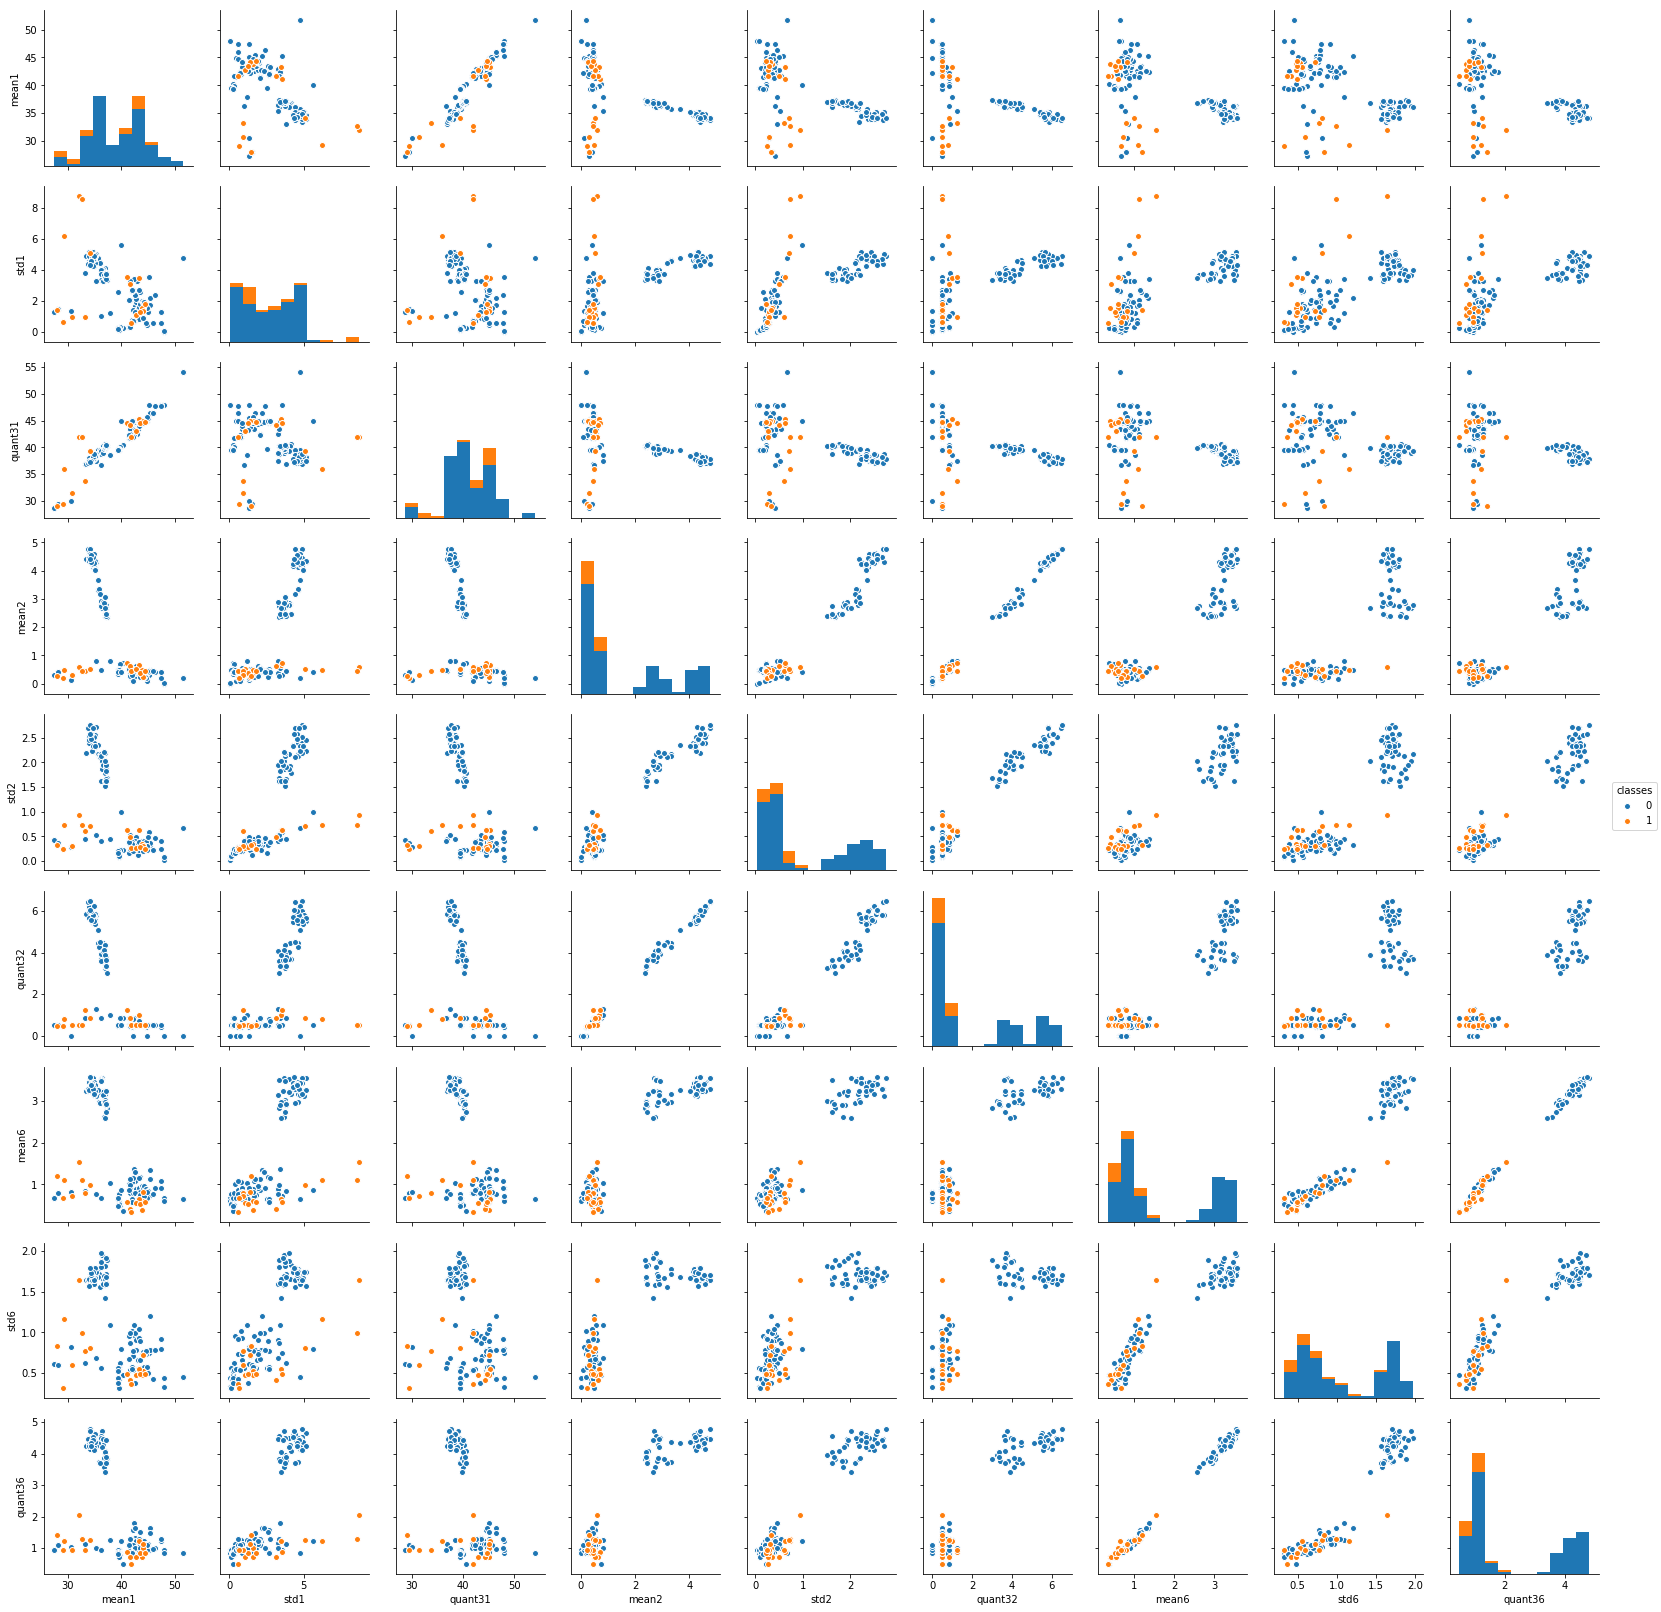

In [35]:
data = attributes(listoflists_train,2,69,9)
new_dataset3= data.iloc[:,[2,3,6,9,10,13,37,38,41,42]]
c= sns.pairplot(new_dataset3,hue ='classes', vars=['mean1','std1','quant31','mean2','std2','quant32','mean6','std6','quant36'])
plt.figure()

In [36]:
best_cv_score=0
best_l=0
optimal_features=[]
for l in range(1,21):
    x_train= attributes(listoflists_train,l,69,9) 
    y_train= x_train.classes
    x_train= x_train.drop(columns='classes')
    list2 = np.array(x_train.columns.values)
    logreg = LogisticRegression(C=1e5)
    for features in range(1,43):
        rfe=RFE(estimator=logreg,n_features_to_select= features)
        rfe=rfe.fit(x_train,y_train)
        cv_score = cross_val_score(estimator=rfe,X= x_train,y= y_train, cv=5, scoring='accuracy')
        cv_mean= np.mean(cv_score)
        if best_cv_score< cv_mean:
            best_cv_score=cv_mean
            optimal_features= list2[rfe.support_]
            best_nooffeautures= features
            best_l= l


In [38]:
best_l

1

In [157]:
best_cv_score

0.9857142857142858

In [39]:
optimal_features

array(['quant31', 'min5', 'max5', 'quant15'], dtype=object)

### iv. Confusion matrix, the ROC and AUC for your classifier on train data, Parameters of our logistic regression βi’s as well as the p-values associated with them

In [40]:
x_optimal= attributes(listoflists_train,best_l,69,9) 
y_train_optimal= x_optimal.classes
x_train_optimal = x_optimal[optimal_features]
 
model=logreg.fit(x_train_optimal, y_train_optimal)
y_train_pred= model.predict(x_train_optimal)
cnf_matrix_train = confusion_matrix(y_train_optimal, y_train_pred)  

fpr_train, tpr_train, thresholds_train= metrics.roc_curve(y_train_optimal,y_train_pred)
roc_auc_train =metrics.auc(fpr_train, tpr_train)
beta= logreg.coef_

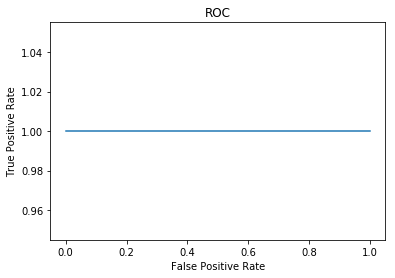

In [41]:
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_train,tpr_train)

In [42]:
cnf_matrix_train

array([[60,  0],
       [ 0,  9]])

In [43]:
roc_auc_train

1.0

In [60]:
p = sm.Logit(y_train_optimal,x_train_optimal)
p_values = p.fit(maxiter=5)
p_values.summary2()

         Current function value: 0.021876
         Iterations: 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            No. Iterations:   5.0000 
Dependent Variable: classes          Pseudo R-squared: 0.944  
Date:               2018-07-02 19:34 AIC:              11.0189
No. Observations:   69               BIC:              19.9553
Df Model:           3                Log-Likelihood:   -1.5094
Df Residuals:       65               LL-Null:          -26.718
Converged:          0.0000           Scale:            1.0000 
---------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------
quant31    -0.7543    0.2897  -2.6041  0.0092  -1.3220  -0.1866
min5        0.2183    0.4382   0.4982  0.6183  -0.6406   1.0773
max5        0.6120    0.3895   1.5714  0.1161  -0.1513   1.3754
quant15     0.6266    0.6046   1.0365  0.3000  -0.5583   1.8115
==============================================================

"""

### v. Test the classifier on the test set. Remember to break the time series in your test set into the same number of time series into which you broke your training set. Remember that the classifier has to be tested using the features extracted from the test set. Compare the accuracy on the test set with the cross-validation accuracy you obtained previously.

In [52]:
x_optimal1= attributes(listoflists_test,best_l,19,4)
y_test_optimal= x_optimal1.classes
x_test_optimal= x_optimal1[optimal_features]

y_test_pred= model.predict(x_test_optimal)
cnf_matrix_test = confusion_matrix(y_test_optimal, y_test_pred) 
fpr_test, tpr_test, thresholds_test= metrics.roc_curve(y_train_optimal,y_train_pred)
roc_auc_test =metrics.auc(fpr_test, tpr_test) 

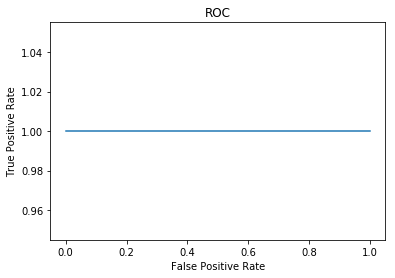

In [54]:
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_test,tpr_test)

In [55]:
roc_auc_test

1.0

In [56]:
cnf_matrix_test

array([[15,  0],
       [ 0,  4]])

Both are fully accurate.

### vi. Do your classes seem to be well-separated to cause instability in calculating logistic regression parameters?

Yes. The classes are well seperated. Hence, it may cause instability in calculating Logistic Regression parameters.

### vii. From the confusion matrices you obtained, do you see imbalanced classes? If yes, build a logistic regression model based on case-control sampling and adjust its parameters. Report the confusion matrix, ROC, and AUC of the model.

In [114]:
best_cv_score=0
best_l=0
optimal_features=[]
for l in range(1,21):
    x_train= attributes(listoflists_train,l,69,9) 
    y_train= x_train.classes
    x_train= x_train.drop(columns='classes')
    list2 = np.array(x_train.columns.values)
    
    us = RandomUnderSampler()
    x_train, y_train = us.fit_sample(x_train, y_train)
    
    logreg = LogisticRegression(C=1e5)
    for features in range(1,43):
        rfe=RFE(estimator=logreg,n_features_to_select= features)
        rfe=rfe.fit(x_train,y_train)
        cv_score = cross_val_score(estimator=rfe,X= x_train,y= y_train, cv=5, scoring='accuracy')
        cv_mean= np.mean(cv_score)
        if best_cv_score< cv_mean:
            best_cv_score=cv_mean
            optimal_features= list2[rfe.support_]
            best_nooffeautures= features
            best_l= l

In [115]:
best_l

1

In [116]:
optimal_features

array(['min1', 'quant31', 'max2', 'median3', 'min5', 'max5', 'mean5',
       'quant15'], dtype=object)

In [117]:
x_train= attributes(listoflists_train,best_l,69,9) 
y_train= x_train.classes
x_train= x_train.drop(columns='classes')

y_train_optimal= y_train
x_train_optimal = x_train[optimal_features]

us1 = RandomUnderSampler()
x_train_optimal, y_train_optimal = us1.fit_sample(x_train_optimal, y_train_optimal)
model=logreg.fit(x_train_optimal, y_train_optimal)

y_train_pred= model.predict(x_train_optimal)
cnf_matrix_train = confusion_matrix(y_train_optimal, y_train_pred)  

fpr_train, tpr_train, thresholds_train= metrics.roc_curve(y_train_optimal,y_train_pred)
roc_auc_train =metrics.auc(fpr_train, tpr_train)
beta= logreg.coef_

In [118]:
cnf_matrix_train

array([[9, 0],
       [0, 9]])

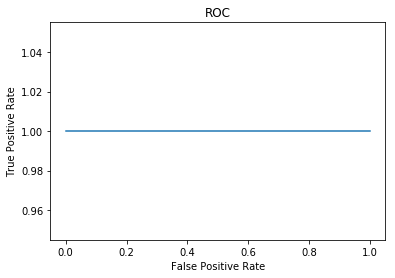

In [119]:
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_train,tpr_train)

In [120]:
roc_auc_train

1.0

In [122]:
x_test= attributes(listoflists_test,best_l,19,4) 
y_test= x_test.classes
x_test= x_test.drop(columns='classes')

y_test_optimal= y_test
x_test_optimal = x_test[optimal_features]
us1 = RandomUnderSampler()
x_test_optimal, y_test_optimal = us1.fit_sample(x_test_optimal, y_test_optimal)

y_test_pred= model.predict(x_test_optimal)
cnf_matrix_test = confusion_matrix(y_test_optimal, y_test_pred)  

fpr_test, tpr_test, thresholds_test= metrics.roc_curve(y_test_optimal,y_test_pred)
roc_auc_test =metrics.auc(fpr_test, tpr_test)
beta= logreg.coef_

In [123]:
cnf_matrix_test

array([[4, 0],
       [0, 4]])

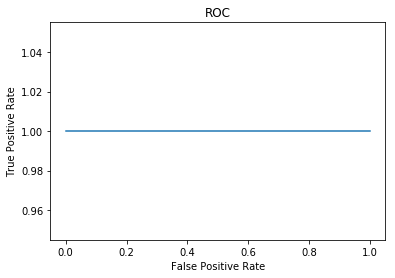

In [124]:
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_test,tpr_test)

In [125]:
roc_auc_test

1.0

### (e) Binary Classification Using L1-penalized logistic regression
### i. Repeat 1(d)iii using L1-penalized logistic regression,8 i.e. instead of using pvalues for variable selection, use L1 regularization.

We have to cross-validate for both l, the number of time series into which you break each of our instances, and λ, the weight of L1 penalty in our logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically

In [ ]:
best_cv_score=0
best_l=0
for l in range(1,21):
    x_train= attributes(listoflists_train,l,69,9) 
    y_train= x_train.classes
    x_train= x_train.drop(columns='classes')
    list2 = np.array(x_train.columns.values)
    
    stdScalar = StandardScaler()
    x_train = stdScalar.fit_transform(x_train)
    
    lreg = LogisticRegressionCV(penalty='l1', solver= 'liblinear',cv =5)
    lreg.fit(x_train, y_train)
    cv_score = cross_val_score(estimator=lreg,X= x_train,y= y_train, cv=5, scoring='accuracy')
    cv_mean= np.mean(cv_score)
    if best_cv_score < cv_mean:
        best_cv_score=cv_mean
        bestC = lreg.C_[0]
        best_l= l

In [150]:
print("Best L value is :", best_l)
print("Best C value is :", bestC)
print("Best CV is :", best_cv_score)

Best L value is : 1
Best C value is : 0.3593813663804626
Best CV is : 0.9857142857142858


[[60  0]
 [ 1  8]]


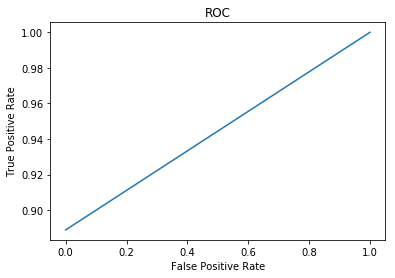

In [156]:
x_train= attributes(listoflists_train,best_l,69,9) 
y_train= x_train.classes
x_train= x_train.drop(columns='classes')

stdScalar = StandardScaler()
x_train = stdScalar.fit_transform(x_train)

lreg = LogisticRegression(penalty='l1', C= bestC,solver= 'liblinear')
model=lreg.fit(x_train, y_train)
y_train_pred= model.predict(x_train)
cnf_matrix_train = confusion_matrix(y_train, y_train_pred)  
print(cnf_matrix_train)

fpr_train, tpr_train, thresholds_train= metrics.roc_curve(y_train,y_train_pred)
roc_auc_train =metrics.auc(fpr_train, tpr_train)
beta= logreg.coef_
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr_train,tpr_train)

### ii. Compare the L1-penalized with variable selection using p-values. Which one performs better? Which one is easier to implement?

Both of them performs well as they have same cross validation accuracy. However, in terms of implementation, l1 penalized logistic regression is easier as it avoids one feature selection loop